NULL HYPOTHESIS 1: Higher dropout rates in females with marital status Married (2) than other marital status.

ALTERNATE HYPOTHESIS 1: Lower or same dropout rates in females with marital status Married (2) than other marital status

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency, stats
import numpy as np

In [27]:
data = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/afdbd38f1842037f4845237cba184e5d/raw/819a506fcb683f89d8584c3b170f45e04e5056a4/student_dropout_analysis.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [28]:
sample_data = data.sample(500)

# Assuming you have the sample data in a pandas DataFrame called 'sample_data'

# Step 1: Calculate sample statistic
sample_statistic = sample_data['Marital status'].mean()  # Example: Mean

# Step 2: Choose a confidence level
confidence_level = 0.95  # For a 95% confidence level

# Step 3: Calculate the standard error (assuming you're estimating the population mean)
sample_size = len(sample_data)
standard_deviation = np.std(sample_data['Marital status'], ddof=1)  # ddof=1 for sample standard deviation
standard_error = standard_deviation / np.sqrt(sample_size)

# Step 4: Compute the margin of error
margin_of_error = ((1 + confidence_level) / 2) * standard_error

# Step 5: Construct the confidence interval
lower_bound = sample_statistic - margin_of_error
upper_bound = sample_statistic + margin_of_error

print("Sample Statistic:", sample_statistic)
print("Confidence Interval:", (lower_bound, upper_bound))
print("Margin of error:", margin_of_error)

Sample Statistic: 1.172
Confidence Interval: (1.1466090010899275, 1.1973909989100724)
Margin of error: 0.02539099891007249


4424


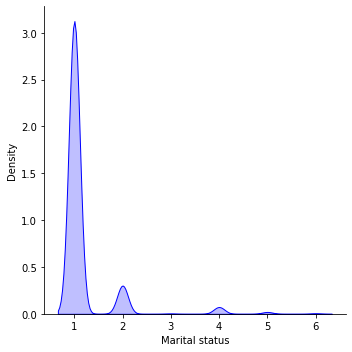

500


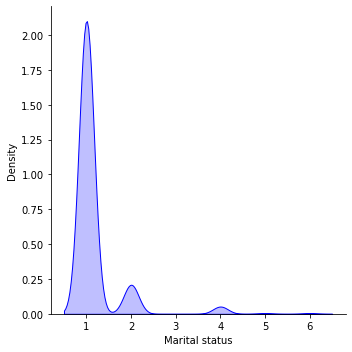

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

print(len(data))
sns.displot(data['Marital status'], kind='kde', color='blue', fill=True)
plt.show()
print(len(sample_data))
sns.displot(sample_data['Marital status'], kind='kde', color='blue', fill=True)
plt.show()

In [36]:
# Assuming you have a pandas DataFrame called 'data' with columns 'Marital status', 'Gender', and 'Target'

# Step 1: Define Null and Alternative Hypotheses
# Null Hypothesis (H0): The dropout rate among females who are married is the same as the dropout rate among females who are not married (=)
# Alternative Hypothesis (H1): The dropout rate among females who are married is different from the dropout rate among females who are not married (not equal to =/=)

# Step 2: Choose a Significance Level (alpha)
alpha = 0.01

# Step 3: Collect Data
# Create a contingency table of observed frequencies
sample_data_with_only_females = sample_data[sample_data['Gender'] == 0]

observed = pd.crosstab(sample_data['Marital status'], sample_data['Target'])
print(observed, "\n\n")

# Step 4: Perform Chi-squared Test
chi2, p_value, _, _ = chi2_contingency(observed)
print(chi2, p_value)

# Step 5: Interpret Results
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence of a difference in dropout rates between females who are married and females who are not married.")
else:
    print("Fail to reject Null Hypothesis: There is no evidence of a difference in dropout rates between females who are married and females who are not married.")


Target          Dropout  Enrolled  Graduate
Marital status                             
1                   134        81       228
2                    18         7        19
4                     7         0         4
5                     0         1         0
6                     0         0         1 


13.681387720108548 0.09045732115482973
Fail to reject Null Hypothesis: There is no evidence of a difference in dropout rates between females who are married and females who are not married.
